In [1]:
!conda install --yes -c conda-forge cartopy

Solving environment: done

## Package Plan ##

  environment location: /home/rishat/Miniconda

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cartopy-0.18.0             |   py38h9b6dd9e_7         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-ha878542_0
  cartopy                             0.18.0-py38hc1e57b6_5 --> 0.18.0-py38h9b6dd9e_7
  certifi                anaconda::certifi-2020.6.20-py38_0 --> conda-forge::certifi-2020.12.5-py38h578d9bd_1



cartopy-0.18.0       | 1.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transactio

In [3]:
import cartopy

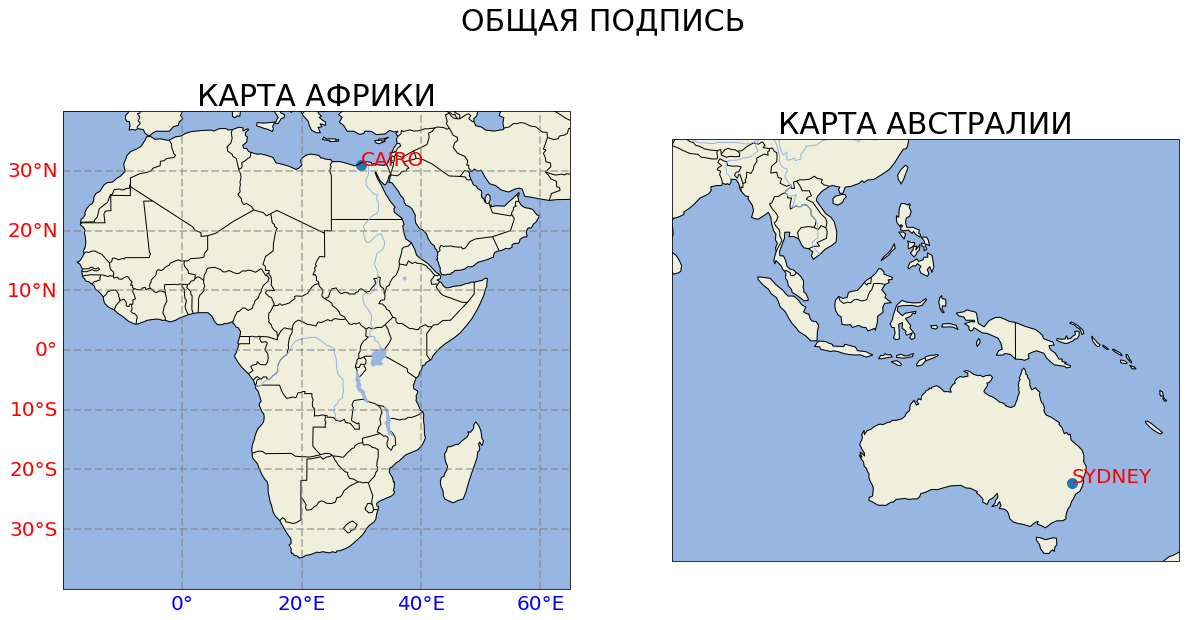

In [64]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy as np

fig = plt.figure(figsize=(20, 10))
fig.suptitle("ОБЩАЯ ПОДПИСЬ", fontsize=30)
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([-20, 65, -40, 40], crs=ccrs.PlateCarree())

#ax.stock_img()


ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)

#x = np.linspace(-20, 65, 500)
#plt.plot(x, 20*np.sin(x))
ax.text(30, 31, "CAIRO", size=20, c="red")
ax.scatter([30], [31], s=100)

ax.set_title("КАРТА АФРИКИ", fontsize=30)

ax1 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax1.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())

#ax.stock_img()


ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.BORDERS)
ax1.add_feature(cfeature.LAKES)
ax1.add_feature(cfeature.RIVERS)
ax1.text(151, -31, "SYDNEY", size=20, c="red")
ax1.scatter([151], [-31], s=100)

ax1.set_title("КАРТА АВСТРАЛИИ", fontsize=30)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 20, 'color': 'red'}
gl.xlabel_style = {'size': 20, 'color': 'blue'}


plt.savefig("pic.png")
plt.show()

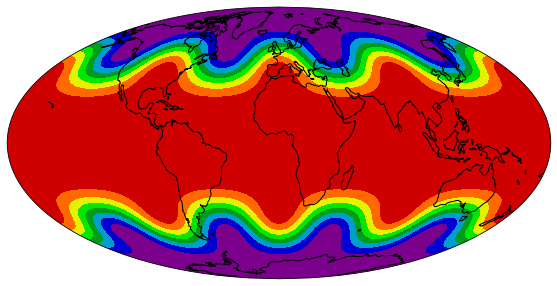

In [65]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs


def sample_data(shape=(73, 145)):
    """Return ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data



fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

lons, lats, data = sample_data()

ax.contourf(lons, lats, data,
            transform=ccrs.PlateCarree(),
            cmap='nipy_spectral')
ax.coastlines()
ax.set_global()
plt.show()




<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known><urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>

<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known><urlopen error [Errno -2] Name or service not known><urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not kn

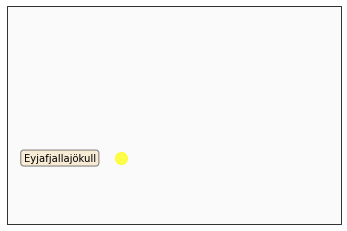

In [66]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt



# Create a MapQuest open aerial instance.
map_quest_aerial = cimgt.MapQuestOpenAerial()

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_quest_aerial.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-22, -15, 63, 65])

# Add the MapQuest data at zoom level 8.
ax.add_image(map_quest_aerial, 8)

# Add a marker for the Eyjafjallajökull volcano.
plt.plot(-19.613333, 63.62, marker='o', color='yellow', markersize=12,
         alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
plt.text(-19.613333, 63.62, u'Eyjafjallajökull',
         verticalalignment='center', horizontalalignment='right',
         transform=text_transform,
         bbox=dict(facecolor='wheat', alpha=0.5, boxstyle='round'))
plt.show()

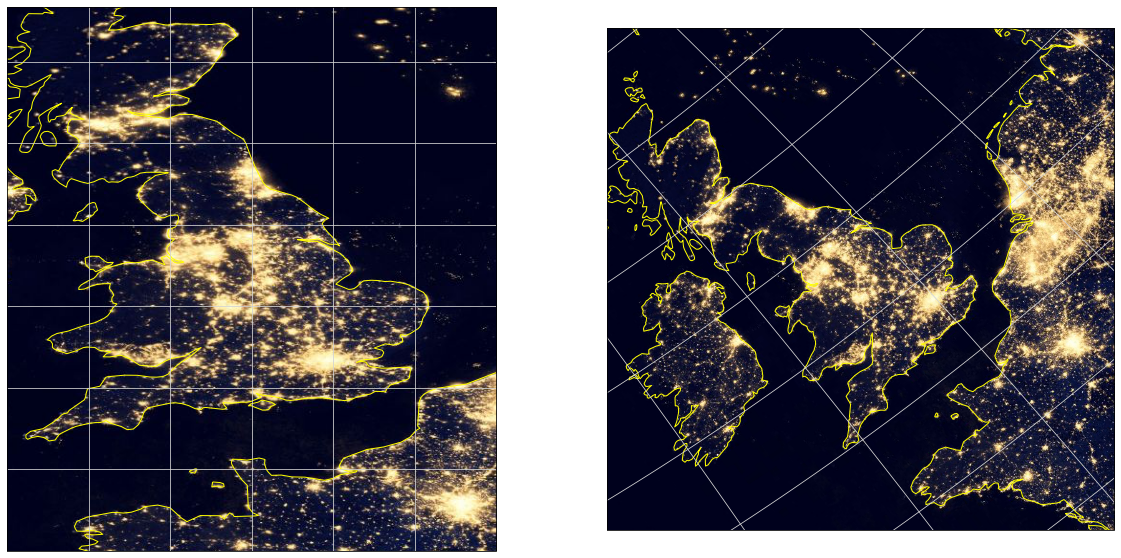

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# Define resource for the NASA night-time illumination data.
base_uri = 'https://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
layer_name = 'VIIRS_CityLights_2012'

# Create a Cartopy crs for plain and rotated lat-lon projections.
plain_crs = ccrs.PlateCarree()
rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=45.0)

fig = plt.figure(figsize=(20,10))

# Plot WMTS data in a specific region, over a plain lat-lon map.
ax = fig.add_subplot(1, 2, 1, projection=plain_crs)
ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='yellow')
ax.gridlines(color='lightgrey', linestyle='-')
# Add WMTS imaging.
ax.add_wmts(base_uri, layer_name=layer_name)

# Plot WMTS data on a rotated map, over the same nominal region.
ax = fig.add_subplot(1, 2, 2, projection=rotated_crs)
ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='yellow')
ax.gridlines(color='lightgrey', linestyle='-')
# Add WMTS imaging.
ax.add_wmts(base_uri, layer_name=layer_name)

plt.show()
